<center> <h1>PREDICIÓN DEL SUEÑO CON MLP MULTICLASE</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>


###### Indice

En este jupyter notebook se lleva a cabo la construcción de un clasificador MLP de salida multiclase para predecir el el estado de vigilia o sueño ligero y  el de sueño profundo.

    1. Clasficador MLP multiclase
        1.1 Preparación datos de entrada y salida
        1.2 Creación del modelo y selección parámetros libres
        1.3 Evaluación del modelo
        1.4 Visualización de resultados

IMPORTAR MÓDULOS

In [1]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn

## 1. CLASIFICADOR MLP MULTICLASE

Se ha utilizado un perceptrón multicapa para clasificar las distintas fases del sueño. Es decir, se ha construido un clasificador con salida multiclase.

### 1.1 Preparación datos de entrada y salida

In [2]:
Train_multi= pd.read_csv('Train.csv')
Test_multi= pd.read_csv('Test.csv')

In [3]:
X_train_multi=Train_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1) 
y_train_multi=Train_multi['Etiquetas multiclase']

X_test_multi=Test_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1)
y_test_multi=Test_multi['Etiquetas multiclase']

### 1.2  Creación del modelo y selección parámetros libres

Se proponen posibles valores de neuronas en la capa oculta para ver con cuál de ellos se obtienen las mejores prestaciones para el modelo. Se crea una tabla que recoge la pérdidas para cada valor del número de neuronas y aquel que tenga menos pérdida es el que se utilizará para el conjunto de test.

Se estudia el número de neuronas para un rango de 4 a 20 cogiendo los valores con saltos de 3.

In [4]:
# Tabla para recoger las prestaciones en train 
columns  = ['Loss','Score']
comp_train = pd.DataFrame(columns=columns)


In [5]:
# Número de neuronas de la capa oculta
n_hidden=range(4,20,3)

for i in n_hidden:
    
    print('\033[4;32m' + 'MLP clasiffier with',i,'neurons in the hidden layer' + '\033[0m')

    model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=(i,), learning_rate='constant',
        learning_rate_init=0.1, shuffle=True, solver='sgd', early_stopping=True, verbose=True, n_iter_no_change=5)

    model.fit(X_train_multi, y_train_multi)
    
    loss=model.loss_  
    comp_train = comp_train.set_value(i,('Loss','Score'),(loss,'Verbose'))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.433333
Iteration 2, loss = 1.66932300
Validation score: 0.433333
Iteration 3, loss = 1.66902461
Validation score: 0.433333
Iteration 4, loss = 1.66976001
Validation score: 0.433333
Iteration 5, loss = 1.67234722
Validation score: 0.433333
Iteration 6, loss = 1.67211219
Validation score: 0.433333
Iteration 7, loss = 1.67031108
Validation score: 0.433333
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 7 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.462500
Iteration 2, loss = 110.75167097
Validation score: 0.462500
Iteration 3, loss = 111.25776496
Validation score: 0.462500
Iteration 4, loss = 111.24068139
Validation score: 0.462500
Iteration 5, loss = 111.21693628
Validation score: 0.462500
Iteration 6, loss = 111.19833218
Validation score: 0.462500
Iteration 7, loss = 111.17613540
Validation score: 0.46250

C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  



Validation score: 0.429167
Iteration 4, loss = 1.49924033
Validation score: 0.429167
Iteration 5, loss = 1.49809735
Validation score: 0.429167
Iteration 6, loss = 1.49778013
Validation score: 0.429167
Iteration 7, loss = 1.49701622
Validation score: 0.429167
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 13 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.516667
Iteration 2, loss = 64.60986650
Validation score: 0.516667
Iteration 3, loss = 64.90185263
Validation score: 0.516667
Iteration 4, loss = 64.89194565
Validation score: 0.516667
Iteration 5, loss = 64.88134875
Validation score: 0.516667
Iteration 6, loss = 64.86848784
Validation score: 0.516667
Iteration 7, loss = 64.85602634
Validation score: 0.516667
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 16 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.48750

C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Las medidas de prestación elegidas para la elección de una topología han sido el validation score y la pérdida. Ambas se pueden ver al aplicar el fit del modelo, gracias al parámetro verbose=True. La pérdida la hemos añadido a la siguiente tabla pero la accuracy de cada epoch para el conjunto de validación hay que verla en la celda anterior. Según estos resultados, la mejor topología de MLP sería la de **n_hidden con 7 neuronas** en la capa oculta, ya que el par (loss,val_score) es el mejor.
En todos los casos el valor 'validation score' está entorno a 0.2, pero el número de neuronas de mayor score y  pérdida baja es 7.

In [6]:
comp_train

,Loss,Score
4,1.67031,Verbose
7,111.176,Verbose
10,1.49702,Verbose
13,64.856,Verbose
16,1.73073,Verbose
19,2.63807,Verbose


### 1.3 Evaluación del modelo

Testeamos el modelo con el número de neuronas en la capa oculta que ofrece la menor pérdida (número neuronas = 7)

In [7]:
columns  = ['Accuracy','Recall','F1-score']
comp_test = pd.DataFrame(columns=columns)

print('\033[4;32m' + 'MLP clasiffier with 7 neurons in the hidden layer' + '\033[0m')

model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=7, learning_rate='constant',
        learning_rate_init=0.1, shuffle=True, solver='sgd', early_stopping=True, verbose=True, n_iter_no_change=5)

model.fit(X_train_multi,y_train_multi)

predictions = model.predict(X_test_multi)
cr=classification_report(y_test_multi,predictions,output_dict=True)
acc,rec,f1=cr['weighted avg']['precision'],cr['weighted avg']['recall'],cr['weighted avg']['f1-score']

comp_test = comp_test.set_value('4', ('Accuracy','Recall','F1-score'),(acc,rec,f1))

MLP clasiffier with 7 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.437500
Iteration 2, loss = 1.63552711
Validation score: 0.437500
Iteration 3, loss = 1.63620447
Validation score: 0.437500
Iteration 4, loss = 1.63668479
Validation score: 0.437500
Iteration 5, loss = 1.63642032
Validation score: 0.437500
Iteration 6, loss = 1.63525399
Validation score: 0.437500
Iteration 7, loss = 1.63471683
Validation score: 0.437500
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


C:\Users\rober\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [8]:
comp_test

,Accuracy,Recall,F1-score
4,0.1936,0.44,0.268889


In [9]:
print("================Classification Report=================")
print(cr)

================Classification Report=================
{'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 70}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46}, '2.0': {'precision': 0.44, 'recall': 1.0, 'f1-score': 0.6111111111111112, 'support': 308}, '3.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 124}, '5.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 152}, 'accuracy': 0.44, 'macro avg': {'precision': 0.088, 'recall': 0.2, 'f1-score': 0.12222222222222223, 'support': 700}, 'weighted avg': {'precision': 0.19360000000000002, 'recall': 0.44, 'f1-score': 0.2688888888888889, 'support': 700}}


### 1.5 Visualización de resultados
A continuación se muestra un ejemplo de las fases del sueño predichas frente a las reales. Para facilitar esta visualización, se muestran la mitad de la muestras del subconjunto de test. 

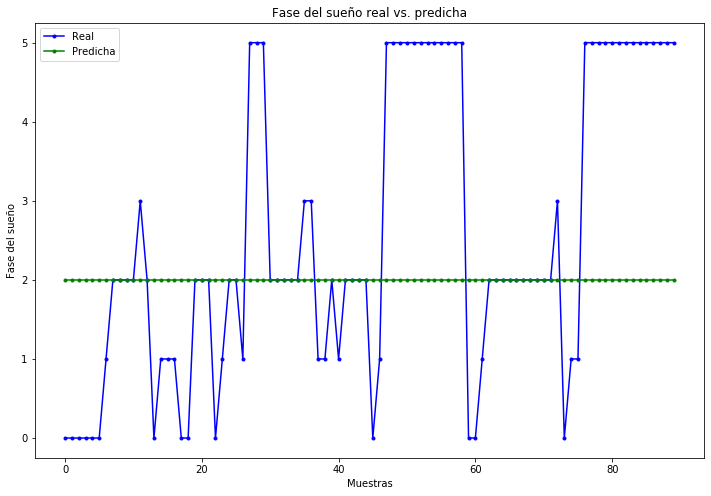

In [10]:
plt.figure(figsize=(12,8))
plt.plot(y_test_multi[0:90],color='blue', marker='.',label='Real')
plt.plot(predictions[0:90],color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()

**Residuos**

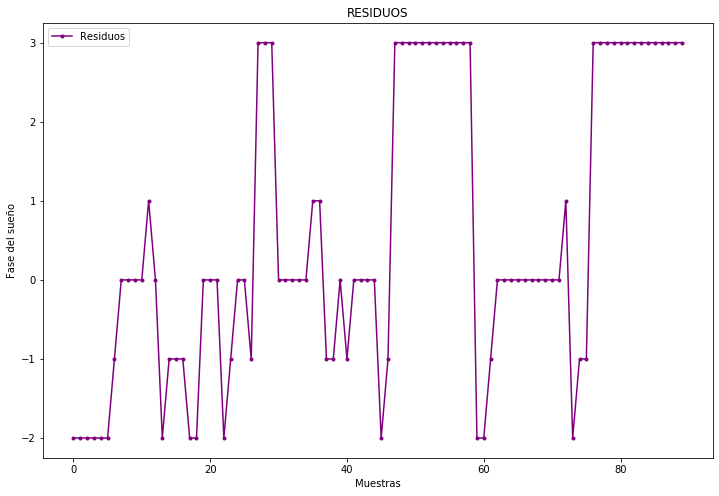

In [11]:
residuos= y_test_multi - predictions
plt.figure(figsize=(12,8))
plt.plot(residuos[0:90],color='purple', marker='.',label='Residuos')

plt.title('RESIDUOS')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()